In [105]:
import importlib
import ETDataInterface as et
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importlib.reload(et)

<module 'ETDataInterface' from 'c:\\Users\\joste\\Personal\\Uni\\9_Semester\\TTK4550_Fordypningsprosjekt\\Code\\Notebooks\\ETDataInterface.py'>

In [106]:
interface = et.ETDataInterface(et.DataSettings(hideBlink=True, envType="DataQualityTest"))
dataset = interface.GetDataset().filter(["Timestamp", "Label", "x", "y", "delta"])

In [107]:
dataset

,Timestamp,Label,x,y,delta
5,2021-12-06 17:07:42.921,FIXATION,0.016628,-0.059872,0 days 00:00:00.030000
6,2021-12-06 17:07:42.952,FIXATION,0.016587,-0.059908,0 days 00:00:00.031000
7,2021-12-06 17:07:42.981,FIXATION,0.016626,-0.059999,0 days 00:00:00.029000
8,2021-12-06 17:07:43.012,FIXATION,0.017076,-0.059738,0 days 00:00:00.031000
9,2021-12-06 17:07:43.042,FIXATION,0.017642,-0.059786,0 days 00:00:00.030000
...,...,...,...,...,...
102,2021-12-07 14:45:26.123,FIXATION,0.504452,0.493337,0 days 00:00:00.030000
103,2021-12-07 14:45:26.153,FIXATION,0.504411,0.493205,0 days 00:00:00.030000
104,2021-12-07 14:45:26.183,FIXATION,0.504439,0.493234,0 days 00:00:00.030000
105,2021-12-07 14:45:26.213,FIXATION,0.504385,0.493363,0 days 00:00:00.030000


In [108]:
edge_test = dataset[0:2884]   # 0  -  2884
point_test = dataset[2884:3694]
point_test2 = dataset[3694:4575]
point_test3 = dataset[4575:]

sc = 90     # oops
corner_point_groups = [point_test[7*sc:8*sc], point_test[0:1*sc], point_test[1*sc:2*sc], point_test[8*sc:9*sc]]
diag_point_groups = [point_test[2*sc:3*sc], point_test[3*sc:4*sc], point_test[4*sc:5*sc], point_test[5*sc:6*sc]]
center_point_group = point_test[6*sc:7*sc]


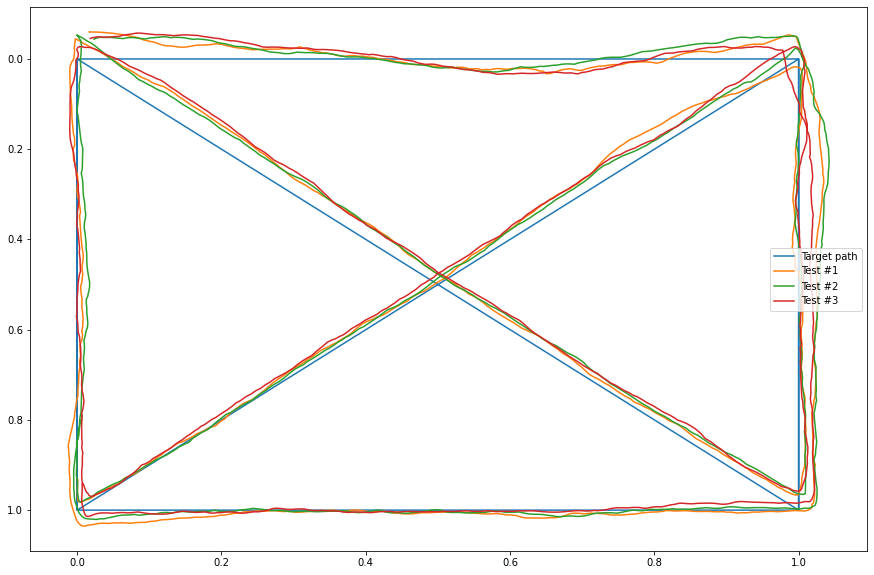

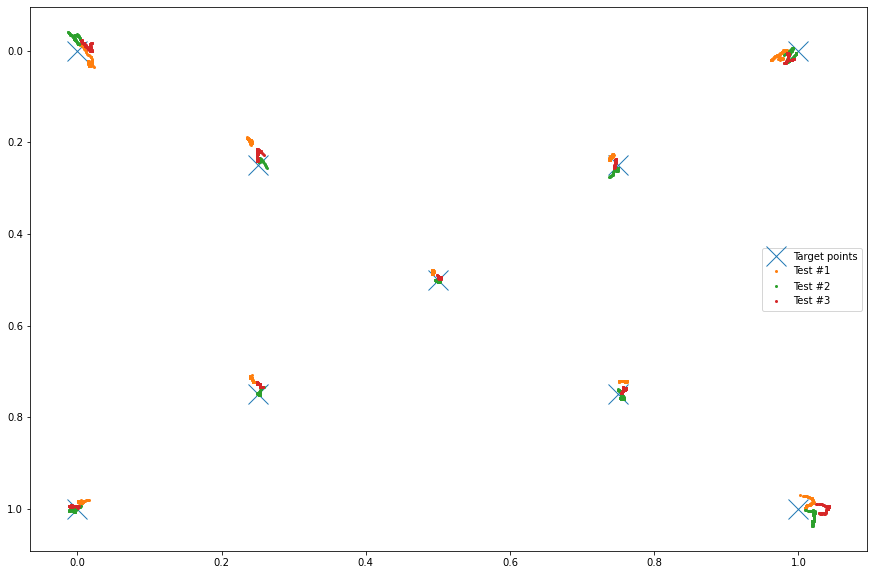

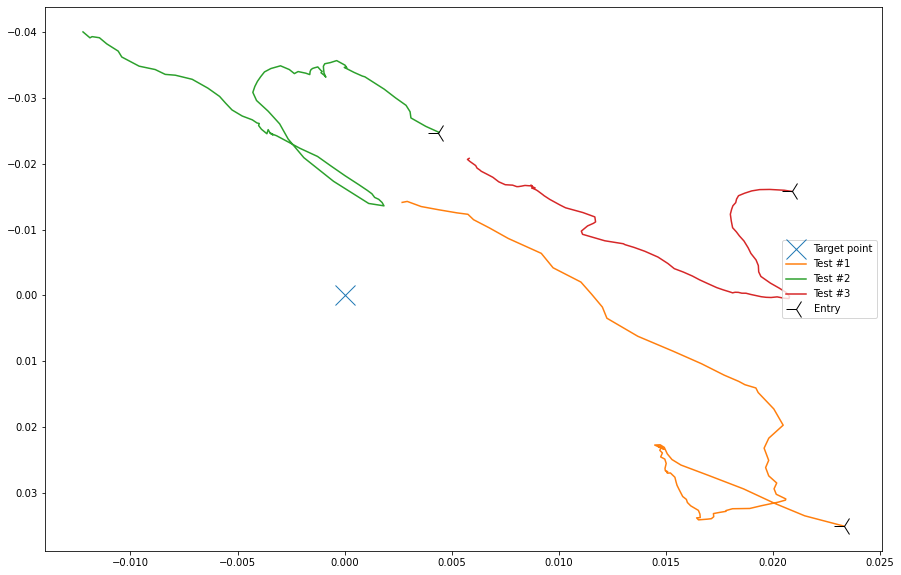

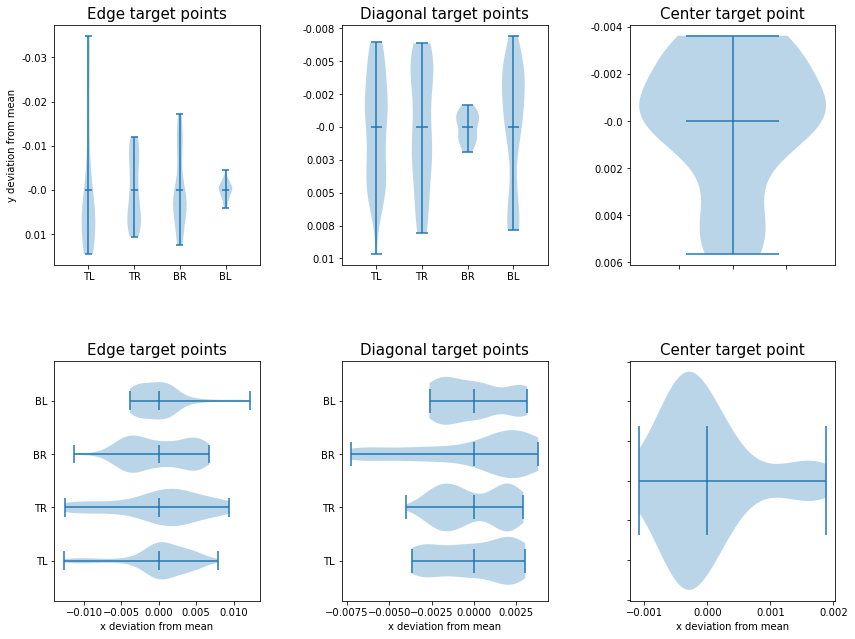

In [160]:
def plotScreenCoords(df):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.plot([0,  0,  1, 1, 0,  1, 1,  0, 0], 
             [0, 1, 1, 0, 0, 1, 0, 1, 0], label="Target path")
    plt.plot(df[:959].x, df[:959].y, label="Test #1")
    plt.plot(df[959:1928].x, df[959:1928].y, label="Test #2")
    plt.plot(df[1928:].x, df[1928:].y, label="Test #3")
    plt.legend(loc="right")
    plt.gca().invert_yaxis()
    # fig.show()

def plotSinglePointAboutTarget(df1, df2, df3):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.plot([0], [0], "x", markersize=20, label="Target point")
    plt.plot(df1[7*sc:8*sc].x, df1[7*sc:8*sc].y, label="Test #1")
    plt.plot(df2[:92].x, df2[:92].y, label="Test #2")
    plt.plot(df3[:94].x, df3[:94].y, label="Test #3")
    plt.plot([df1.iloc[7*sc].x, df2.iloc[0].x, df3.iloc[0].x],
             [df1.iloc[7*sc].y, df2.iloc[0].y, df3.iloc[0].y], "3", color="k", markersize=20, label="Entry")
    # plt.plot([df1.iloc[8*sc-1].x, df2.iloc[92].x, df3.iloc[94].x],
    #          [df1.iloc[8*sc-1].y, df2.iloc[92].y, df3.iloc[94].y], ">", markersize=20, label="End")
    plt.legend(loc="right")
    plt.gca().invert_yaxis()

def plotMultiPointsAboutTarget(df1, df2, df3):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.plot([0], [0], "x", markersize=20, label="Target point")
    plt.plot(df1[6*sc:7*sc].x-0.5, df1[6*sc:7*sc].y-0.5, color='#ff7f0e', label="Target=TL edge")
    # plt.plot(df2[:92].x, df2[:92].y, color="#ff7f0e")
    # plt.plot(df3[:94].x, df3[:94].y, color="#ff7f0e")
    plt.plot(df1[4*sc:5*sc].x-0.75, df1[4*sc:5*sc].y-0.75, color='#2ca02c', label="Target=TL diagonal")
    # plt.plot(df2[376:484].x-0.25, df2[376:484].y-0.25, color="#2ca02c")
    # plt.plot(df3[383:490].x-0.25, df3[383:490].y-0.25, color="#2ca02c")
    plt.plot(df1[1*sc:2*sc].x-1, df1[1*sc:2*sc].y-1, color='#d62728', label="Target=center")
    # plt.plot(df2[781:].x-0.5, df2[781:].y-0.5, color="#d62728")
    # plt.plot(df3[786:].x-0.5, df3[786:].y-0.5, color="#d62728")
    # plt.plot([df1.iloc[7*sc].x, df1.iloc[2*sc].x-0.25, df1.iloc[6*sc].x-0.5],
    #          [df1.iloc[7*sc].y, df1.iloc[2*sc].y-0.25, df1.iloc[6*sc].y-0.5], "3", color="k", markersize=20, label="Entry")
    # plt.plot([df1.iloc[8*sc-1].x, df2.iloc[92].x, df3.iloc[94].x],
    #          [df1.iloc[8*sc-1].y, df2.iloc[92].y, df3.iloc[94].y], ">", markersize=20, label="End")
    plt.legend(loc="right")
    plt.gca().invert_yaxis()

def plotScatterScreenCoords(df1, df2, df3):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.plot([0,  0,  1,  1,  .25,  .25,  .75,  .75,  .5], 
             [0,  1,  1,  0,  .25,  .75,  .25,  .75,  .5], "x", markersize=20, label="Target points")
    plt.plot(df1.x, df1.y, "o", markersize=2, label="Test #1")
    plt.plot(df2.x, df2.y, "o", markersize=2, label="Test #2")
    plt.plot(df3.x, df3.y, "o", markersize=2, label="Test #3")
    plt.legend(loc="right")
    plt.gca().invert_yaxis()
    # fig.show()

def set_xaxis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    # ax.set_xticks(np.arange(1, len(labels) + 1), labels)
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    # ax.set_xlabel('Sample name')
def set_yaxis_style(ax, labels):
    ax.yaxis.set_tick_params(direction='out')
    ax.yaxis.set_ticks_position('left')
    # ax.set_xticks(np.arange(1, len(labels) + 1), labels)
    ax.set_yticks(np.arange(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_ylim(0.25, len(labels) + 0.75)
    # ax.set_ylabel('Sample name')

import matplotlib.ticker as ticker
@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str(round(-x, 3))
    return label
    
def plotViolinplots(edge_groups, diag_groups, center_group):
    fs = 15  # fontsize

    pos = [1, 2, 3, 4]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.4   # the amount of width reserved for blank space between subplots
    hspace = 0.0   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

    edge_xvals = [df.x.apply(lambda k : k - df.x.mean()) for df in edge_groups]
    edge_yvals = [df.y.apply(lambda k : -(k - df.y.mean())) for df in edge_groups]
    diag_xvals = [df.x.apply(lambda k : k - df.x.mean()) for df in diag_groups]
    diag_yvals = [df.y.apply(lambda k : -(k - df.y.mean())) for df in diag_groups]

    for i in range(len(edge_xvals)):
        edge_xvals[i] 

    axes[0, 0].violinplot(edge_yvals, pos, points=20, widths=0.3,
                        showmeans=True, showextrema=True, showmedians=False)
    axes[0, 0].set_title('Edge target points', fontsize=fs)

    axes[0, 1].violinplot(diag_yvals, pos, points=40, widths=0.5,
                        showmeans=True, showextrema=True, showmedians=False,
                        bw_method='silverman')
    axes[0, 1].set_title('Diagonal target points', fontsize=fs)

    axes[0, 2].violinplot(center_group.y.apply(lambda k : -(k - center_group.y.mean())), [1], points=60, widths=0.7, showmeans=True,
                        showextrema=True, showmedians=False, bw_method=0.5)
    axes[0, 2].set_title('Center target point', fontsize=fs)

    axes[1, 0].violinplot(edge_xvals, pos, points=80, vert=False, widths=0.7,
                        showmeans=True, showextrema=True, showmedians=False)
    axes[1, 0].set_title('Edge target points', fontsize=fs)

    axes[1, 1].violinplot(diag_xvals, pos, points=100, vert=False, widths=0.9,
                        showmeans=True, showextrema=True, showmedians=False,
                        bw_method='silverman')
    axes[1, 1].set_title('Diagonal target points', fontsize=fs)

    axes[1, 2].violinplot(center_group.x.apply(lambda k : k - center_group.x.mean()), [1], points=200, vert=False, widths=1.1,
                        showmeans=True, showextrema=True, showmedians=False,
                        bw_method=0.5)
    axes[1, 2].set_title('Center target point', fontsize=fs)

    labels = ['TL', 'TR', 'BR', 'BL']
    for ax in [axes[0, 0], axes[0, 1]]:
        set_xaxis_style(ax, labels)
    for ax in [axes[1, 0], axes[1, 1]]:
        set_yaxis_style(ax, labels)
    
    axes[0,2].set_xticklabels([])
    axes[1,2].set_yticklabels([])
    axes[0,0].set_ylabel("y deviation from mean")
    axes[1,0].set_xlabel("x deviation from mean")
    axes[1,1].set_xlabel("x deviation from mean")
    axes[1,2].set_xlabel("x deviation from mean")
    axes[0,0].yaxis.set_major_formatter(major_formatter)
    axes[0,1].yaxis.set_major_formatter(major_formatter)
    axes[0,2].yaxis.set_major_formatter(major_formatter)

    # Normalize axes. Looks ugly
    # ymin = -0.015
    # ymax = 0.035
    # ystep = 0.01
    # axes[0,0].set_yticks(np.arange(ymin - ystep, ymax + ystep, ystep))
    # axes[0,1].set_yticks(np.arange(ymin - ystep, ymax + ystep, ystep))
    # axes[0,2].set_yticks(np.arange(ymin - ystep, ymax + ystep, ystep))
    # xmin = -0.015
    # xmax = 0.015
    # xstep = 0.01
    # axes[1,0].set_xticks(np.arange(xmin - xstep, xmax + xstep, xstep))
    # axes[1,1].set_xticks(np.arange(xmin - xstep, xmax + xstep, xstep))
    # axes[1,2].set_xticks(np.arange(xmin - xstep, xmax + xstep, xstep))

    # fig.suptitle("Violin Plotting Examples")
    fig.subplots_adjust(hspace=0.4)
    plt.gca().invert_yaxis()
    plt.show()

%matplotlib inline
# plotScreenCoords(point_test)
# plotScreenCoords(corner_test)
plotScreenCoords(edge_test)
plotScatterScreenCoords(point_test, point_test2, point_test3)
plotSinglePointAboutTarget(point_test, point_test2, point_test3)
# plotMultiPointsAboutTarget(point_test, point_test2, point_test3)
# plotScatterHistogram(center_point)
plotViolinplots(corner_point_groups, diag_point_groups, center_point_group)

edge_xvals = [df.x.apply(lambda k : k - df.x.mean()) for df in corner_point_groups]
edge_yvals = [df.y.apply(lambda k : -(k - df.y.mean())) for df in corner_point_groups]
diag_xvals = [df.x.apply(lambda k : k - df.x.mean()) for df in diag_point_groups]
diag_yvals = [df.y.apply(lambda k : -(k - df.y.mean())) for df in diag_point_groups]

# temp = pd.DataFrame({
#     "Ex": [df.x.std() for df in corner_point_groups],
# })
from statistics import mean

edgeTargets={
    "x":[0, 1, 1, 0],
    "y":[0, 0, 1, 1]
}
diagTargets={
    "x":[.25, .75, .75, .25],
    "y":[.25, .25, .75, .75]
}

dataStd = pd.DataFrame({
    "Target point": ["Center", "Diagonal", "Edge"],
    'C': [
        f'({round(center_point_group.x.std(), 3)}, \
           {round(center_point_group.y.std(), 3)})',
        None,
        None,
    ],
    "TL": [
        None,
        f'({round(diag_point_groups[0].x.std(), 3)}, \
           {round(diag_point_groups[0].y.std(), 3)})',
        f'({round(corner_point_groups[0].x.std(), 3)}, \
           {round(corner_point_groups[0].y.std(), 3)})',
    ],
    "TR": [
        None,
        f'({round(diag_point_groups[1].x.std(), 3)}, \
           {round(diag_point_groups[1].y.std(), 3)})',
        f'({round(corner_point_groups[1].x.std(), 3)}, \
           {round(corner_point_groups[1].y.std(), 3)})',
    ],
    "BR": [
        None,
        f'({round(diag_point_groups[2].x.std(), 3)}, \
           {round(diag_point_groups[2].y.std(), 3)})',
        f'({round(corner_point_groups[2].x.std(), 3)}, \
           {round(corner_point_groups[2].y.std(), 3)})',
    ],
    "BL": [
        None,
        f'({round(diag_point_groups[3].x.std(), 3)}, \
           {round(diag_point_groups[3].y.std(), 3)})',
        f'({round(corner_point_groups[3].x.std(), 3)}, \
           {round(corner_point_groups[3].y.std(), 3)})',
    ],
})
dataBias = pd.DataFrame({
    "Target point": ["Center", "Diagonal", "Edge"],
    'C': [
        f'({round(center_point_group.x.median()-0.5, 3)}, \
           {round(center_point_group.y.median()-0.5, 3)})',
        None,
        None,
    ],
    "TL": [
        None,
        f'({round(diag_point_groups[0].x.median()-diagTargets["x"][0], 3)}, \
           {round(diag_point_groups[0].y.median()-diagTargets["y"][0], 3)})',
        f'({round(corner_point_groups[0].x.median()-edgeTargets["x"][0], 3)}, \
           {round(corner_point_groups[0].y.median()-edgeTargets["y"][0], 3)})',
    ],
    "TR": [
        None,
        f'({round(diag_point_groups[1].x.median()-diagTargets["x"][1], 3)}, \
           {round(diag_point_groups[1].y.median()-diagTargets["y"][1], 3)})',
        f'({round(corner_point_groups[1].x.median()-edgeTargets["x"][1], 3)}, \
           {round(corner_point_groups[1].y.median()-edgeTargets["y"][1], 3)})',
    ],
    "BR": [
        None,
        f'({round(diag_point_groups[2].x.median()-diagTargets["x"][2], 3)}, \
           {round(diag_point_groups[2].y.median()-diagTargets["y"][2], 3)})',
        f'({round(corner_point_groups[2].x.median()-edgeTargets["x"][2], 3)}, \
           {round(corner_point_groups[2].y.median()-edgeTargets["y"][2], 3)})',
    ],
    "BL": [
        None,
        f'({round(diag_point_groups[3].x.median()-diagTargets["x"][3], 3)}, \
           {round(diag_point_groups[3].y.median()-diagTargets["y"][3], 3)})',
        f'({round(corner_point_groups[3].x.median()-edgeTargets["x"][3], 3)}, \
           {round(corner_point_groups[3].y.median()-edgeTargets["y"][3], 3)})',
    ],
})
dataStd = dataStd.set_index("Target point")
dataBias = dataBias.set_index("Target point")

In [161]:
dataStd

,C,TL,TR,BR,BL
Target point,,,,,
Center,"(0.001, 0.003)",None,None,None,None
Diagonal,None,"(0.002, 0.004)","(0.002, 0.004)","(0.003, 0.001)","(0.002, 0.005)"
Edge,None,"(0.004, 0.014)","(0.006, 0.007)","(0.004, 0.008)","(0.003, 0.002)"


In [162]:
dataBias

,C,TL,TR,BR,BL
Target point,,,,,
Center,"(-0.007, -0.018)",None,None,None,None
Diagonal,None,"(-0.01, -0.055)","(-0.01, -0.019)","(0.01, -0.029)","(-0.009, -0.036)"
Edge,None,"(0.016, 0.025)","(-0.025, 0.011)","(0.014, -0.01)","(0.004, -0.016)"
